# CA3  Capstone Project - Final
# Name: Denisse Garcia
# Student ID: SBS24050


### This is the part 2 of the project - Analisys, evaluation and study of Dataset 2

"www.kaggle.com. (n.d.). eCommerce Customer Service Satisfaction. [online] Available at: https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction."


In [1]:
#!pip install lightgbm

## 1.  **Importing Necessary Modules**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

In [3]:
data=pd.read_csv('Customer_support_data.csv')
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## 2. **Data Understanding** 

In [4]:
data.shape

(85907, 20)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_price,17206.0,5660.774846,12825.728411,0.0,392.0,979.0,2699.75,164999.0
connected_handling_time,242.0,462.400826,246.295037,0.0,293.0,427.0,592.25,1986.0
CSAT Score,85907.0,4.242157,1.378903,1.0,4.0,5.0,5.00,5.0


In [6]:
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [7]:
data['CSAT Score'].value_counts()

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64

In [8]:
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [9]:
# Printing the data structure
print('Datatype in Each Column\n')
pd.DataFrame({
    'Datatype': data.dtypes, 
    'Unique Values': data.nunique(), 
    'Total Values': len(data)
}).rename_axis("Column Name")

Datatype in Each Column



,Datatype,Unique Values,Total Values
Column Name,,,
Unique id,object,85907,85907
channel_name,object,3,85907
category,object,12,85907
Sub-category,object,57,85907
Customer Remarks,object,18231,85907
Order_id,object,67675,85907
order_date_time,object,13766,85907
Issue_reported at,object,30923,85907
issue_responded,object,30262,85907


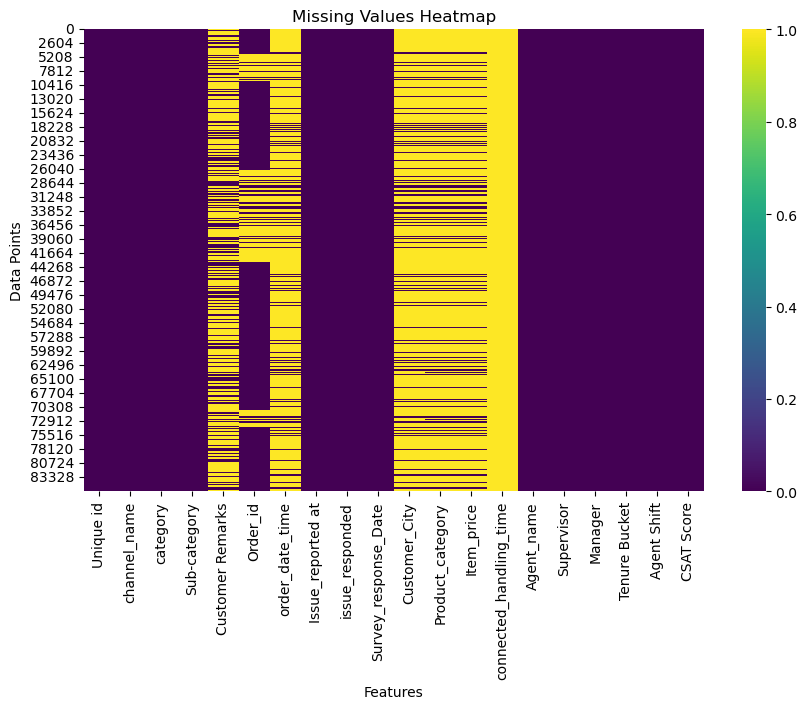

Number of missing values per column:
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [10]:
missing_values = data.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = data.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

🔍 Number of missing values per column:

connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
dtype: int64


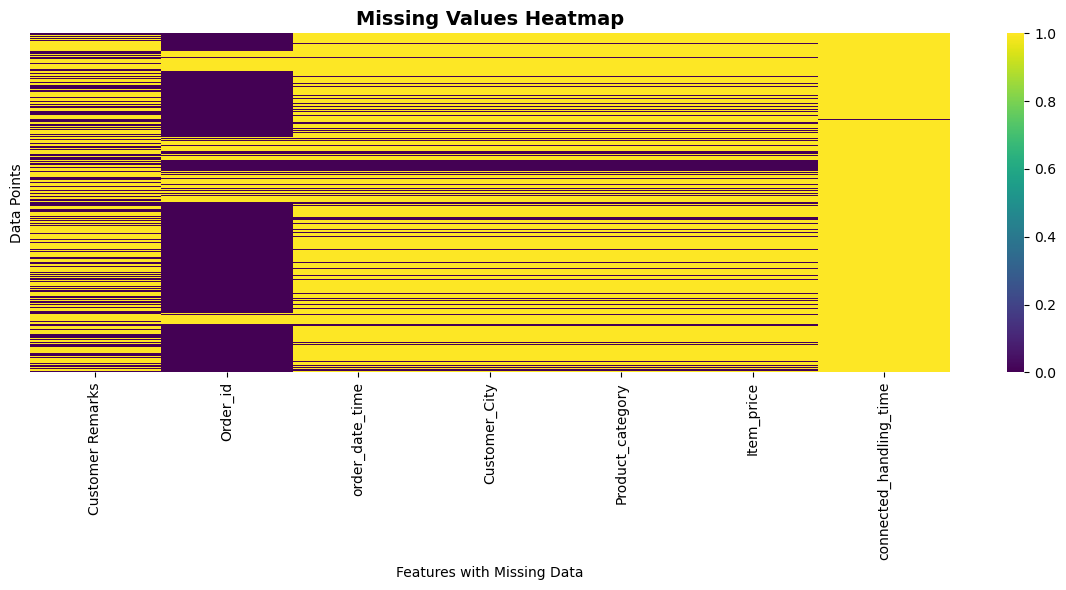

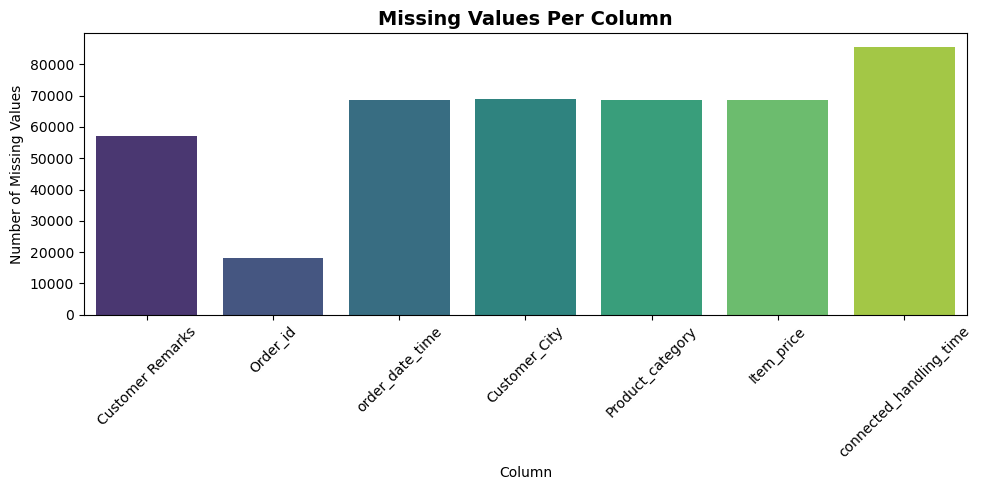

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns with at least 1 missing value
missing_count = data.isnull().sum()
missing_cols = missing_count[missing_count > 0]

# Optional: print missing summary
print("🔍 Number of missing values per column:\n")
print(missing_cols.sort_values(ascending=False))

# 1. Heatmap of missing values (only relevant columns)
plt.figure(figsize=(12, 6))
sns.heatmap(
    data[missing_cols.index].isnull(),
    cmap='viridis',
    cbar=True,
    yticklabels=False
)

plt.title('Missing Values Heatmap', fontsize=14, weight='bold')
plt.xlabel('Features with Missing Data')
plt.ylabel('Data Points')
plt.tight_layout()
plt.show()

# 2. Bar plot of missing value count per column (corrected for Seaborn v0.14+)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_cols.index,
    y=missing_cols.values,
    hue=missing_cols.index,
    palette='viridis',
    legend=False
)
plt.title('Missing Values Per Column', fontsize=14, weight='bold')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
data.duplicated().sum()

0

In [13]:
# Drop columns with >75% missing values
df_clean=data.copy()
missing_threshold = 0.75
df_clean = df_clean.dropna(axis=1, thresh=int((1 - missing_threshold) * len(df_clean)))

# Fill missing categorical data with "Unknown"
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].fillna('Unknown')

# Fill missing numerical values with median
for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Preview cleaned dataset
df_clean.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Unknown,c27c9bb4-fa36-4140-9f1f-21009254ffdb,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Unknown,d406b0c7-ce17-4654-b9de-f08d421254bd,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Unknown,c273368d-b961-44cb-beaf-62d6fd6c00d5,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Unknown,5aed0059-55a4-4ec6-bb54-97942092020a,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Unknown,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


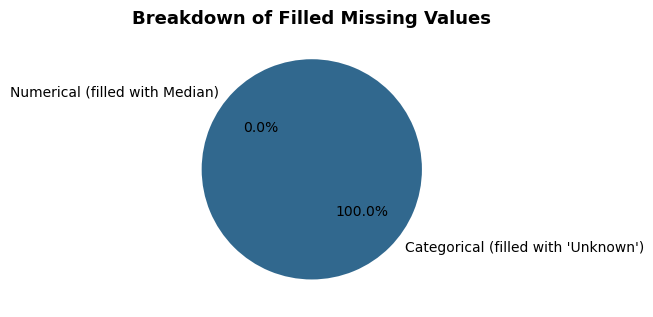

In [14]:
# Original dataset stats
total_cols = data.shape[1]
dropped_cols = total_cols - df_clean.shape[1]

# Count of filled values
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include=np.number).columns

filled_categorical = data[cat_cols].isnull().sum().sum()
filled_numerical = data[num_cols].isnull().sum().sum()


# Pie chart: Type of missing values filled
plt.figure(figsize=(6, 6))
plt.pie(
    [filled_categorical, filled_numerical],
    labels=["Categorical (filled with 'Unknown')", "Numerical (filled with Median)"],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", 2)
)
plt.title("Breakdown of Filled Missing Values", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

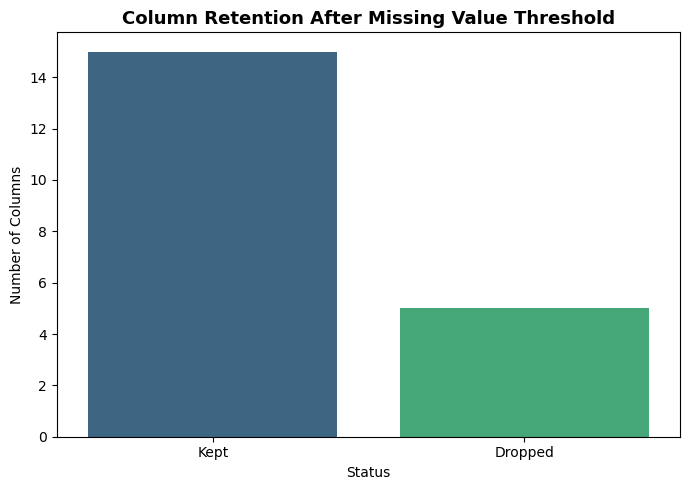

In [15]:
# Create DataFrame for barplot
bar_df = pd.DataFrame({
    "Status": ["Kept", "Dropped"],
    "Columns": [df_clean.shape[1], dropped_cols]
})

# Plot with hue to satisfy Seaborn's new requirement
plt.figure(figsize=(7, 5))
sns.barplot(data=bar_df, x="Status", y="Columns", hue="Status", palette="viridis", legend=False)
plt.title("Column Retention After Missing Value Threshold", fontsize=13, weight='bold')
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()

In [16]:
# Recalculate available columns to drop (check existence before dropping)
columns_to_drop = [
    'Unique id', 'Order_id', 'order_date_time',
    'Issue_reported at', 'issue_responded', 'Survey_response_Date'
]

# Drop only columns that exist
existing_columns_to_drop = [col for col in columns_to_drop if col in df_clean.columns]
df_clean.drop(columns=existing_columns_to_drop, inplace=True)

# Show the final cleaned column list
df_clean.columns.tolist()


['channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [17]:
df_clean.head()

,channel_name,category,Sub-category,Customer Remarks,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,Unknown,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,Unknown,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,Unknown,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,Unknown,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,Unknown,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


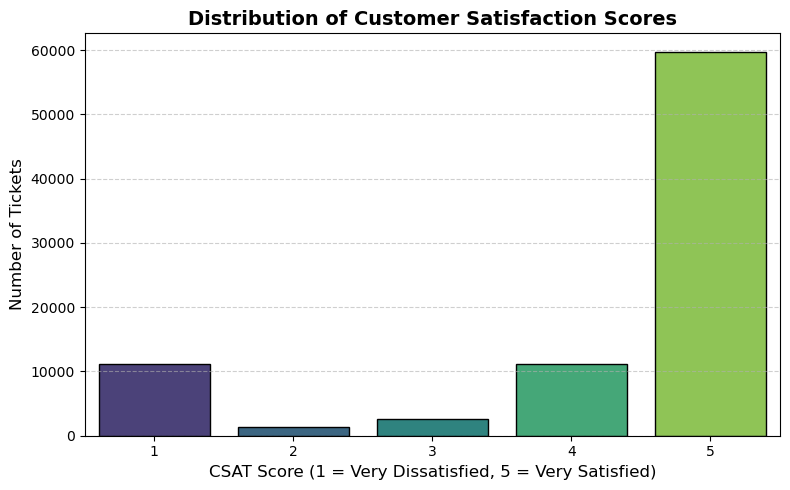

In [18]:
# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

# Plot: Distribution of CSAT Score
plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x='CSAT Score',
    hue='CSAT Score',
    palette=sns.color_palette("viridis", data['CSAT Score'].nunique()),
    edgecolor='black',
    legend=False
)


# Enhancements for styling
plt.title('Distribution of Customer Satisfaction Scores', fontsize=14, weight='bold')
plt.xlabel('CSAT Score (1 = Very Dissatisfied, 5 = Very Satisfied)', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


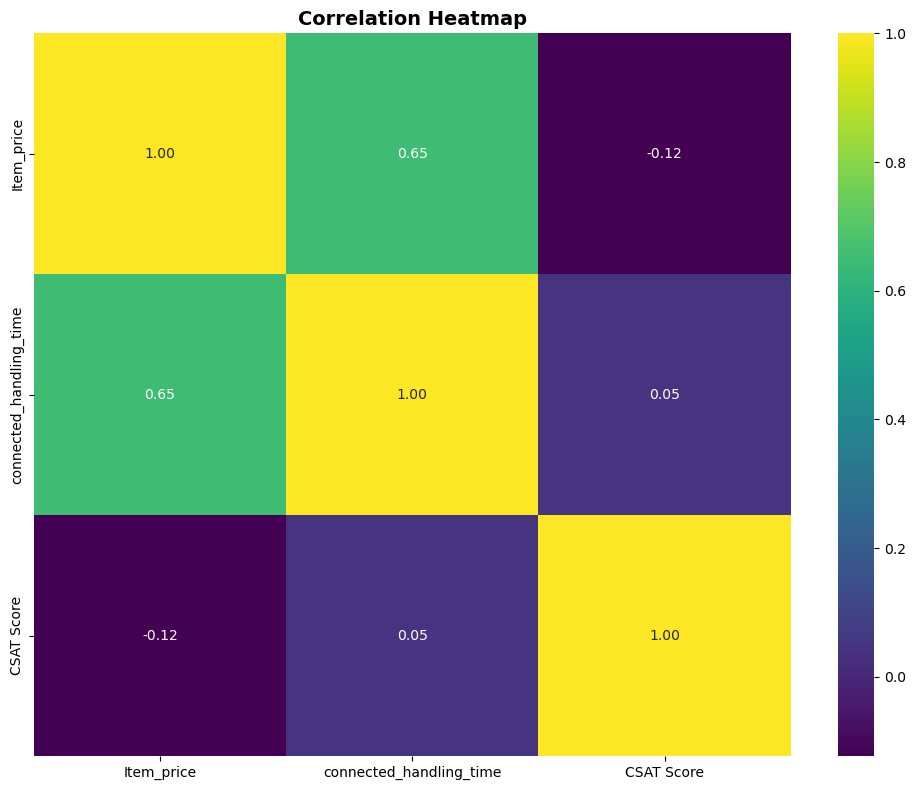

In [19]:
# Correlation heatmap for numerical features

# Heatmap using Viridis palette
plt.figure(figsize=(10, 8))
sns.heatmap(
    numerical_data.corr(),
    annot=True,
    fmt='.2f',
    cmap='viridis',
    cbar=True
)
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Boxplot: Response time vs CSAT Score with Viridis palette
if 'response_time_hrs' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=data,
        x='CSAT Score',
        y='response_time_hrs',
        palette=sns.color_palette("viridis", data['CSAT Score'].nunique())
    )
    plt.title('Response Time vs CSAT Score', fontsize=14, weight='bold')
    plt.xlabel('CSAT Score', fontsize=12)
    plt.ylabel('Response Time (hrs)', fontsize=12)
    plt.tight_layout()
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned data
df_encoded = df_clean.copy()

# Encode all categorical features
label_encoders_all = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders_all[col] = le

In [21]:
# Define Features and Target
X = df_encoded.drop(columns=['CSAT Score'])
y = df_encoded['CSAT Score']

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
# Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Evaluation Funtion

This function calculates and prints key performance metrics (Accuracy, Precision, Recall, F1 Score) and shows a confusion matrix for each model

In [24]:
# Store evaluation results
metrics_results = {}

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    metrics_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    # Display results
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix Plot with Viridis
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
                xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


# Train and Evaluate Models

# 🌲 Random Forest



=== Random Forest ===
Accuracy: 0.5562
Precision: 0.5589
Recall: 0.5562
F1 Score: 0.5575

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.26      0.27      2246
           2       0.02      0.03      0.03       256
           3       0.04      0.04      0.04       512
           4       0.15      0.15      0.15      2244
           5       0.72      0.72      0.72     11924

    accuracy                           0.56     17182
   macro avg       0.24      0.24      0.24     17182
weighted avg       0.56      0.56      0.56     17182



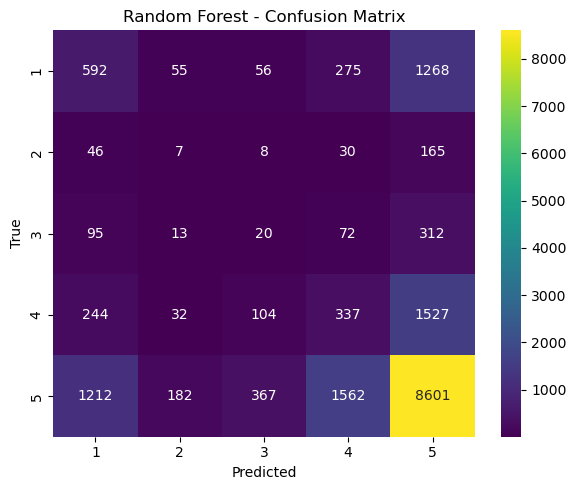

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predict and evaluate
rf_preds = rf.predict(X_test)
evaluate_model("Random Forest", y_test, rf_preds)


# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 238465, number of used features: 9
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438

=== LightGBM ===
Accuracy: 0.6216
Precision: 0.5783
Recall: 0.6216
F1 Score: 0.5924

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.25      0.31      2246
           2       0.02      0.06      0.03       256
           3       0.05   

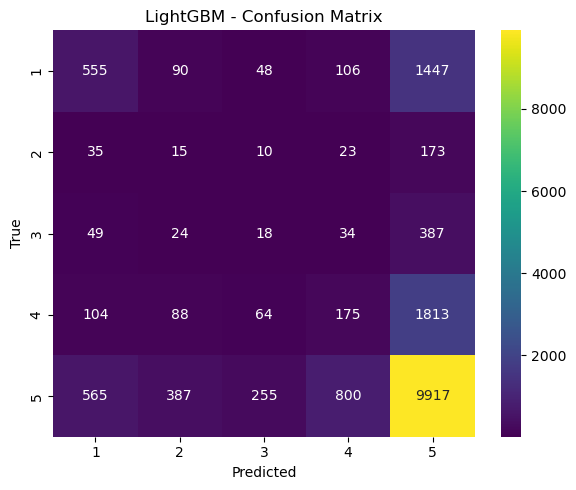

In [26]:
import lightgbm as lgb

# Train LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_sm, y_train_sm)

# Predict and evaluate
lgbm_preds = lgbm.predict(X_test)
evaluate_model("LightGBM", y_test, lgbm_preds)


# Decision Tree


=== Decision Tree ===
Accuracy: 0.4843
Precision: 0.5553
Recall: 0.4843
F1 Score: 0.5147

Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.28      0.25      2246
           2       0.02      0.04      0.03       256
           3       0.03      0.06      0.04       512
           4       0.14      0.20      0.16      2244
           5       0.73      0.60      0.66     11924

    accuracy                           0.48     17182
   macro avg       0.23      0.24      0.23     17182
weighted avg       0.56      0.48      0.51     17182



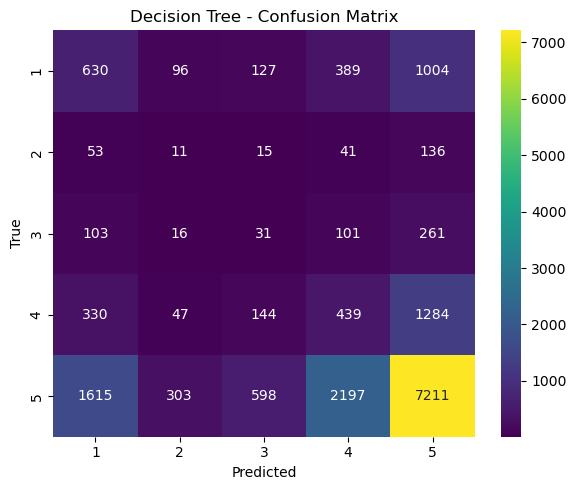

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)

# Predict and evaluate
dt_preds = dt.predict(X_test)
evaluate_model("Decision Tree", y_test, dt_preds)


# Convert results to DataFrame

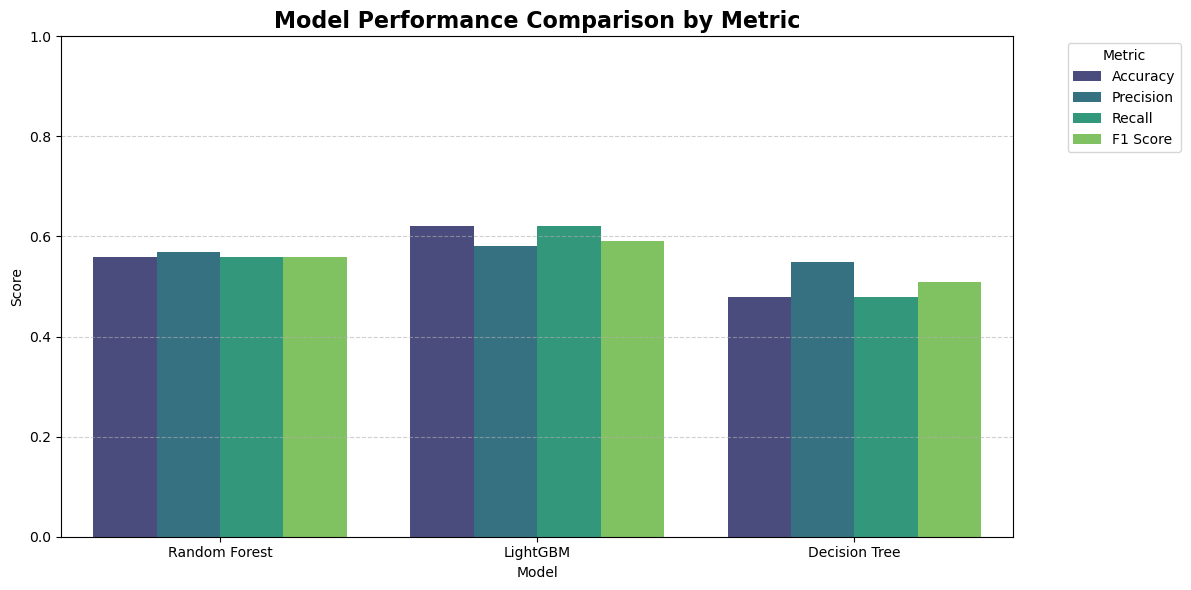

In [28]:

# Sample data to simulate the metrics_results (replace this with your actual data)
metrics_results = {
    "Random Forest": {"Accuracy": 0.56, "Precision": 0.57, "Recall": 0.56, "F1 Score": 0.56},
    "LightGBM": {"Accuracy": 0.62, "Precision": 0.58, "Recall": 0.62, "F1 Score": 0.59},
    "Decision Tree": {"Accuracy": 0.48, "Precision": 0.55, "Recall": 0.48, "F1 Score": 0.51}
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results).T
metrics_df_reset = metrics_df.reset_index().rename(columns={'index': 'Model'})
melted_df = metrics_df_reset.melt(id_vars='Model', var_name='Metric', value_name='Score')

# 1. Grouped Bar Chart of Metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title("Model Performance Comparison by Metric", fontsize=16, weight='bold')
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



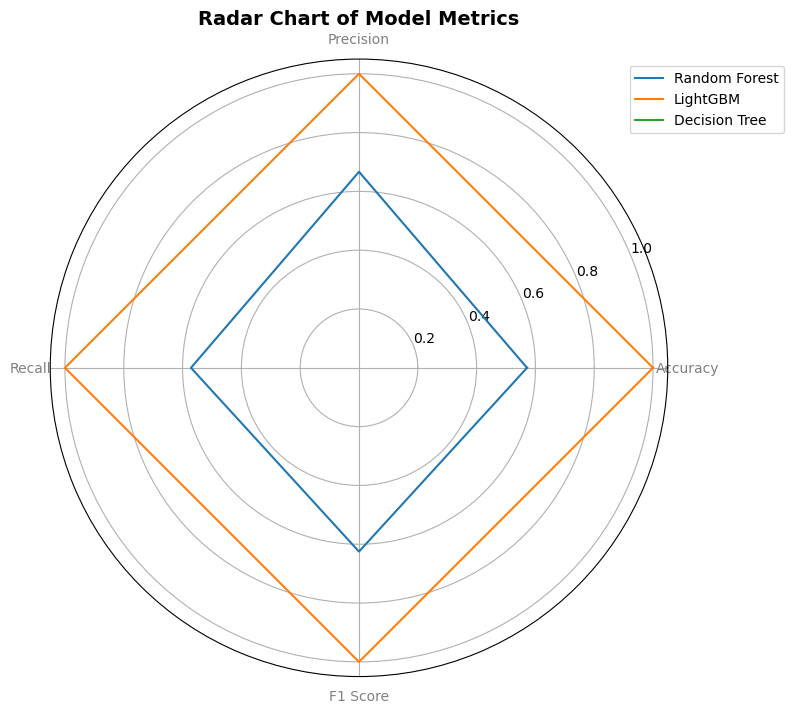

,Accuracy,Precision,Recall,F1 Score
Random Forest,56.00%,57.00%,56.00%,56.00%
LightGBM,62.00%,58.00%,62.00%,59.00%
Decision Tree,48.00%,55.00%,48.00%,51.00%


In [29]:
# 2. Radar Chart (Spider Plot)
# Normalize data between 0-1
metrics_df_norm = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())
labels = metrics_df.columns.tolist()
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for index, row in metrics_df_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=index)

plt.xticks(angles[:-1], labels, color='grey', size=10)
plt.title("Radar Chart of Model Metrics", fontsize=14, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# 3. Formatted Metrics Table
styled_table = metrics_df.style.format("{:.2%}")
styled_table

In [30]:
# Save metrics table to CSV
metrics_df.to_csv("Data2_model_metrics_summary.csv")